In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ucimlrepo import fetch_ucirepo 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', None)
 
X = pd.read_csv("hepatitis.csv")



In [3]:
X.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [4]:
X.tail(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,42.0,True,die


In [5]:
X.sample(3)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
116,24,female,False,False,True,False,False,True,False,False,False,False,False,1.0,NaN,34.0,4.1,NaN,True,live
142,51,female,True,False,True,False,False,True,True,True,True,False,True,1.0,NaN,20.0,3.0,63.0,True,live
141,54,female,False,False,True,True,False,NaN,NaN,True,False,True,False,3.9,120.0,28.0,3.5,43.0,True,die


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [7]:
print(X.isna().sum(),"\n\n" ,X.dtypes)

# print(X.info(verbose=True))

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64 

 age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtyp

In [8]:
import pandas as pd

# Assuming your dataset is stored in X
numerical = X.select_dtypes(include=['float64', 'int64']).columns
categorical = X.select_dtypes(include=['object', 'bool']).columns


print("Numerical Columns:")
print(numerical)

print("\nCategorical Columns:")
print(categorical)


Numerical Columns:
Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], dtype='object')

Categorical Columns:
Index(['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology', 'class'],
      dtype='object')


In [9]:
X.shape

(155, 20)

In [10]:
print("number of samples is :",X.shape[0])
print("number of features is :",X.shape[1])

number of samples is : 155
number of features is : 20


In [11]:
X.describe()
X2=X.copy()

class
live    0.793548
die     0.206452
Name: proportion, dtype: float64


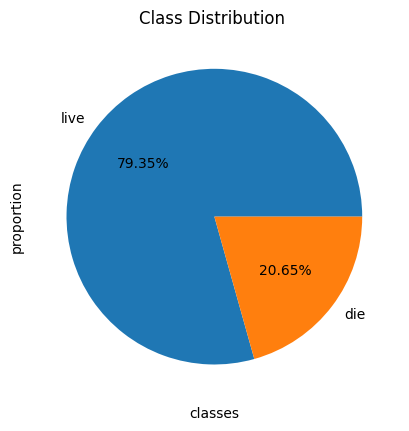

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

class_distribution = X['class'].value_counts(normalize=True)
print(class_distribution)


class_distribution.plot(kind='pie', color='#69C420',autopct="%0.2f%%")
plt.title('Class Distribution ')
plt.xlabel('classes')
plt.ylabel('proportion')
plt.show()

Text(0.5, 1.0, 'bilirubin')

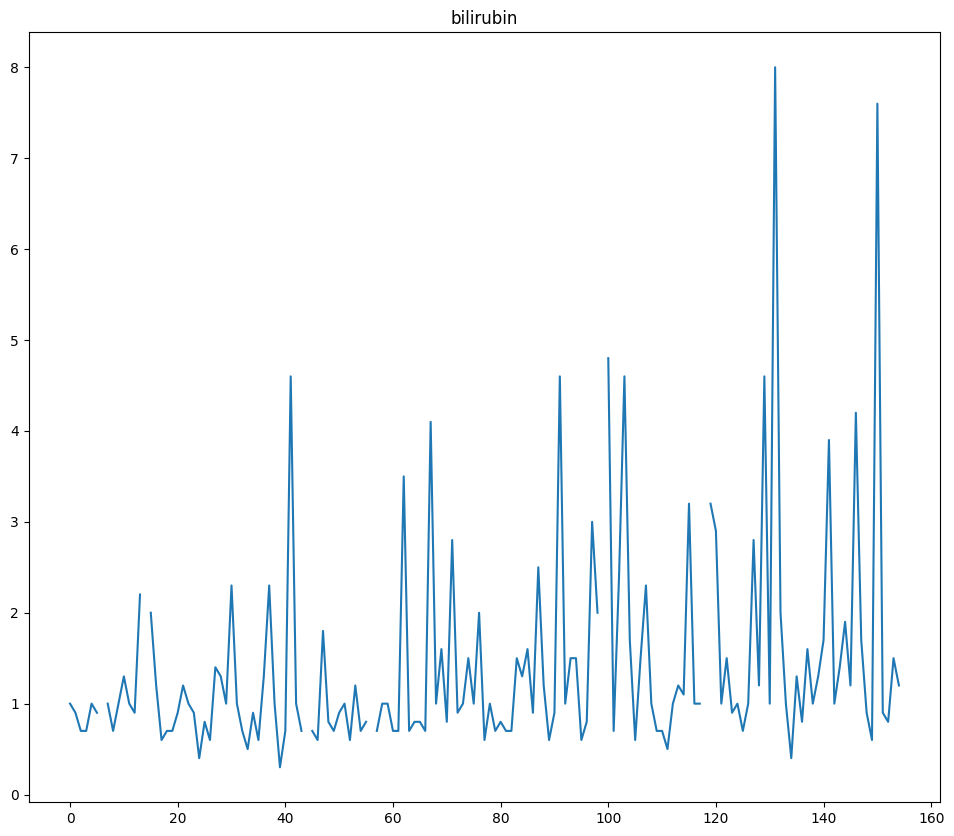

In [13]:
plt.figure(figsize=(40,10))
plt.subplot(1, 3, 2)
plt.plot(X['bilirubin'])
plt.title('bilirubin')

Text(0.5, 1.0, 'histology')

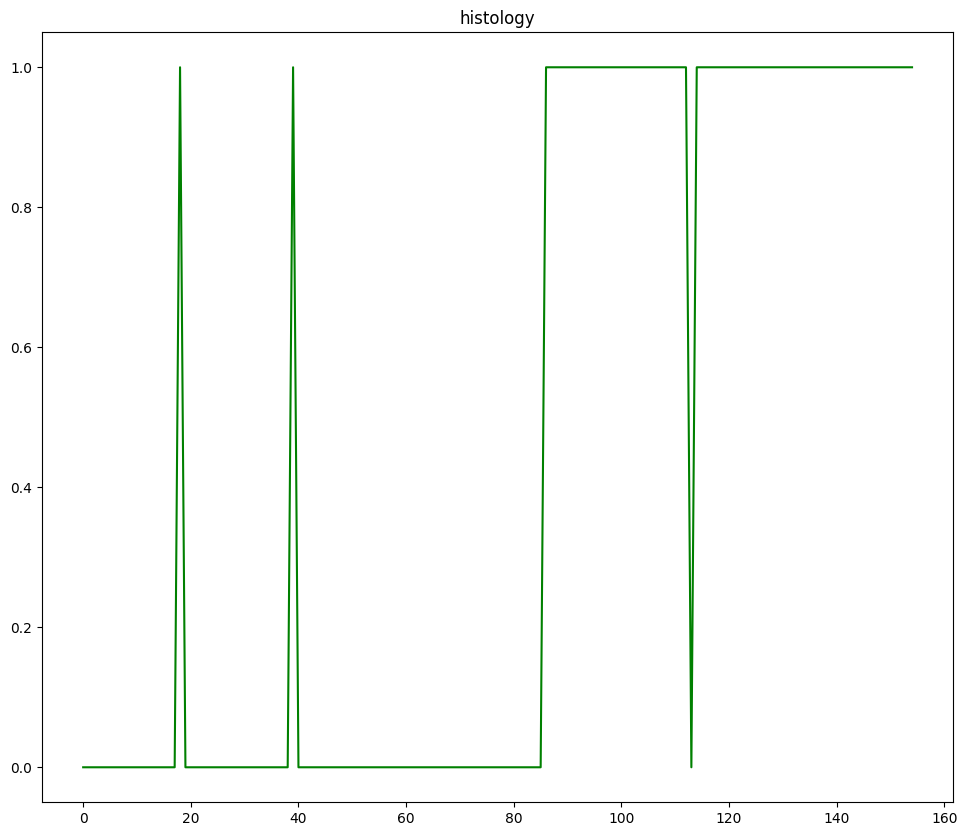

In [14]:
plt.figure(figsize=(40,10))
plt.subplot(1, 3, 2)
plt.plot(X['histology'],color="green")
plt.title('histology')

Text(0.5, 1.0, 'albumin')

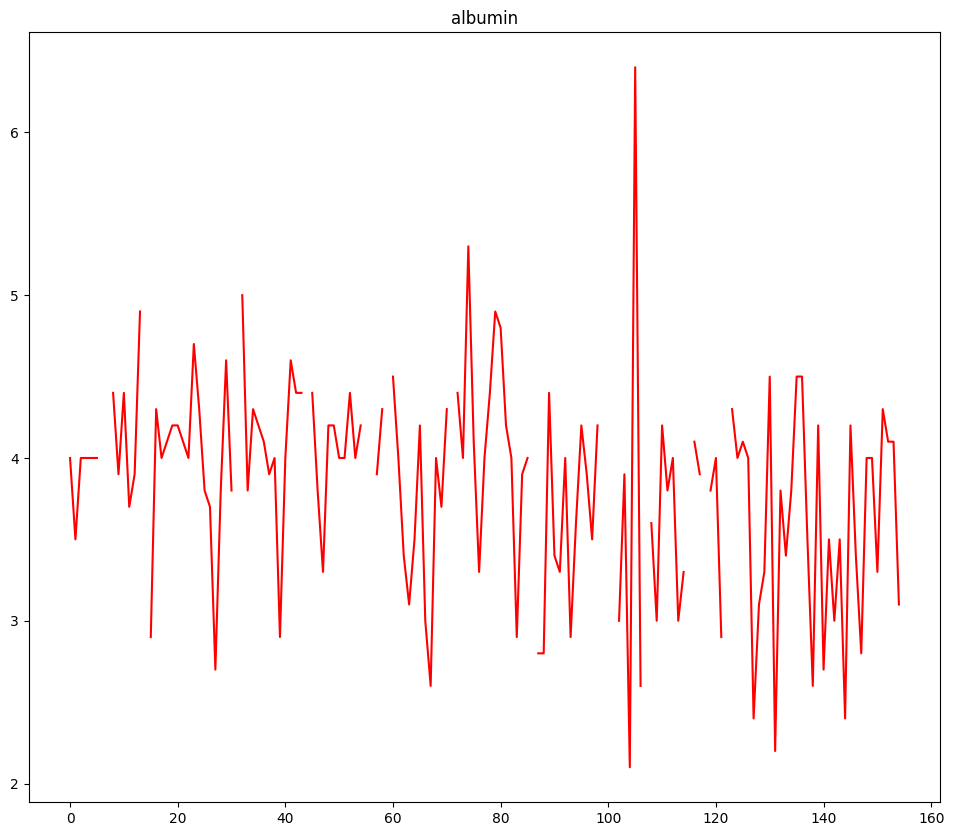

In [15]:
plt.figure(figsize=(40,10))
plt.subplot(1, 3, 2)
plt.plot(X['albumin'],color="red")
plt.title('albumin')

Text(0.5, 1.0, 'protime')

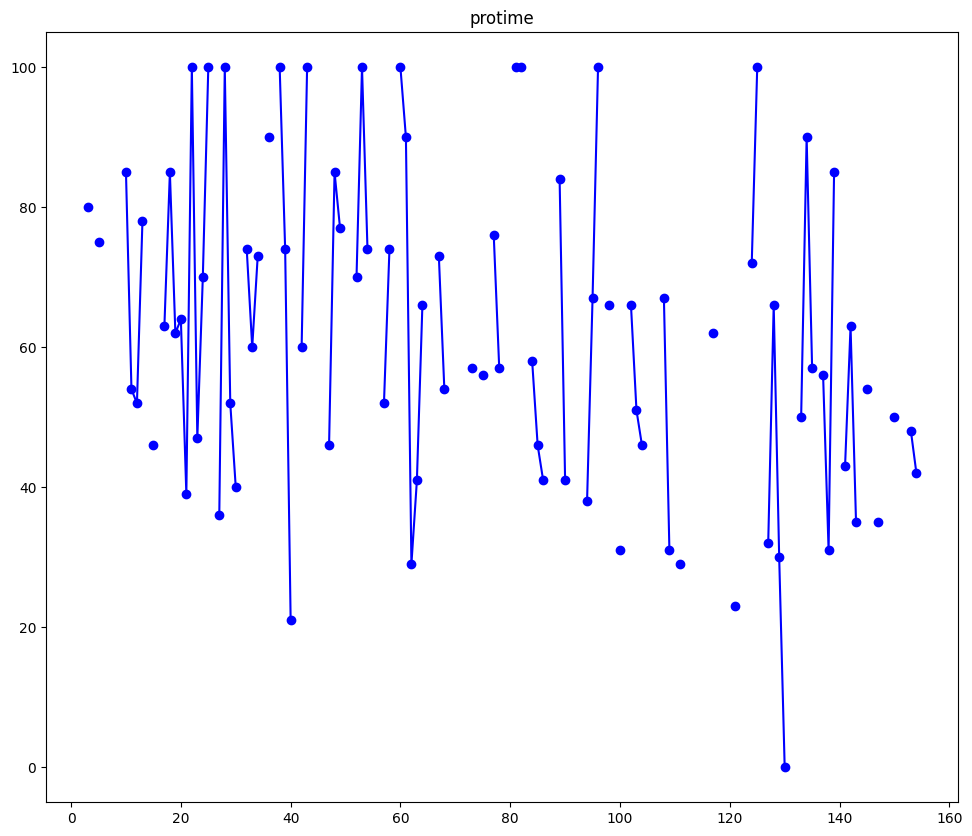

In [16]:
plt.figure(figsize=(40,10))
plt.subplot(1, 3, 1)
plt.plot(X['protime'], marker='o', linestyle='-', color='b')
plt.title('protime')


In [17]:
X.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [18]:
missing_samples= X[X.isna().any(axis=1)]
print(f"samples that contains missing values:{missing_samples.head(6)}")

samples that contains missing values:   age     sex steroid  antivirals fatigue malaise anorexia liver_big  \
0   30    male   False       False   False   False    False     False   
1   50  female   False       False    True   False    False     False   
2   78  female    True       False    True   False    False      True   
3   31  female     NaN        True   False   False    False      True   
4   34  female    True       False   False   False    False      True   
6   51  female   False       False    True   False     True      True   

  liver_firm spleen_palpable spiders ascites varices  bilirubin  \
0      False           False   False   False   False        1.0   
1      False           False   False   False   False        0.9   
2      False           False   False   False   False        0.7   
3      False           False   False   False   False        0.7   
4      False           False   False   False   False        1.0   
6      False            True    True   False   Fa

In [19]:
missing_features= X.columns[X.isna().any(axis=0)]
print("Features with missing values:")
for index,feature in enumerate(missing_features):
    print(f"- {index} {feature}")

Features with missing values:
- 0 steroid
- 1 fatigue
- 2 malaise
- 3 anorexia
- 4 liver_big
- 5 liver_firm
- 6 spleen_palpable
- 7 spiders
- 8 ascites
- 9 varices
- 10 bilirubin
- 11 alk_phosphate
- 12 sgot
- 13 albumin
- 14 protime


In [20]:
missing_values_count = X.isna().sum()
print("Number of missing values in each feature:")
print(missing_values_count)


Number of missing values in each feature:
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64


In [21]:
new_df = X.dropna()
new_df.shape

(80, 20)

In [22]:

new_df2 = X.dropna(axis=1)
print(new_df2.shape)
print(new_df2.head(5))

(155, 5)
   age     sex  antivirals  histology class
0   30    male       False      False  live
1   50  female       False      False  live
2   78  female       False      False  live
3   31  female        True      False  live
4   34  female       False      False  live


In [23]:
for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        X.loc[:, col] = X[col].fillna(X[col].mean())
    else:
        X.loc[:, col] = X[col].fillna(X[col].mode()[0])
print("Number of missing values after imputation:")
print(X.isna().sum())


Number of missing values after imputation:
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21136\4140372215.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, col] = X[col].fillna(X[col].mode()[0])


In [24]:
X.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,1.427517,105.325397,85.894040,3.817266,61.852273
std,12.565878,1.188301,46.405585,88.478932,0.616750,17.193528
min,7.000000,0.300000,26.000000,14.000000,2.100000,0.000000
25%,32.000000,0.800000,78.000000,32.500000,3.500000,57.000000
50%,39.000000,1.000000,102.000000,59.000000,3.900000,61.852273
75%,50.000000,1.500000,119.500000,99.000000,4.200000,65.000000
max,78.000000,8.000000,295.000000,648.000000,6.400000,100.000000


In [25]:
descr = X.describe()
descr
Q3 = descr.iloc[6]
Q3


age               50.0
bilirubin          1.5
alk_phosphate    119.5
sgot              99.0
albumin            4.2
protime           65.0
Name: 75%, dtype: float64

In [26]:
Q1 = descr.loc["25%"]
Q1
IQR=Q3-Q1
print(IQR)


age              18.0
bilirubin         0.7
alk_phosphate    41.5
sgot             66.5
albumin           0.7
protime           8.0
dtype: float64


In [27]:
lb=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
print(f"lower bond is {lb}")
print(f"upper bond is {ub}")

lower bond is age               5.00
bilirubin        -0.25
alk_phosphate    15.75
sgot            -67.25
albumin           2.45
protime          45.00
dtype: float64
upper bond is age               77.00
bilirubin          2.55
alk_phosphate    181.75
sgot             198.75
albumin            5.25
protime           77.00
dtype: float64


In [28]:
X_remove=X2.copy()
for col in X_remove.columns:
        if X_remove[col].dtype in ['float64', 'int64']:
              
            X_remove[col] = np.where(X_remove[col] < lb[col], lb[col], X_remove[col])
            X_remove[col] = np.where(X_remove[col] > ub[col], ub[col], X_remove[col])
X_remove.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    float64
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

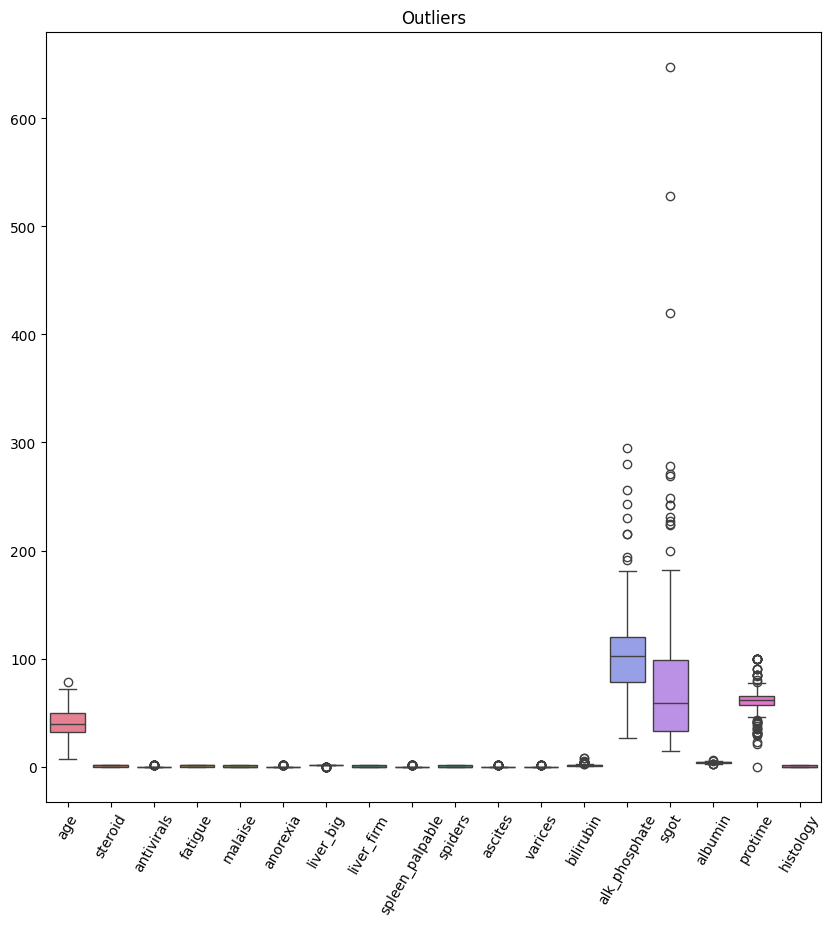

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.title("Outliers")
sns.boxplot(data=X)
plt.xticks(rotation=60)

plt.show()


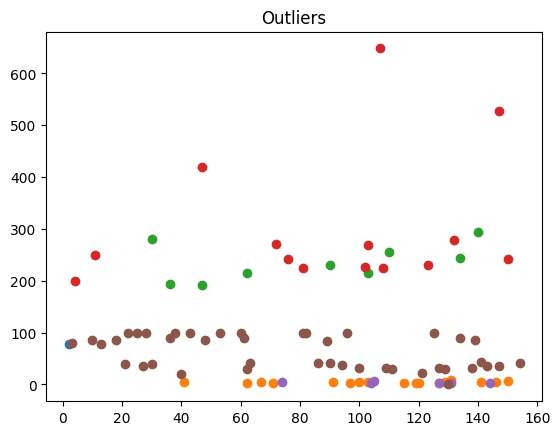

    age  bilirubin  alk_phosphate   sgot  albumin  protime
0   NaN        NaN            NaN    NaN      NaN      NaN
1   NaN        NaN            NaN    NaN      NaN      NaN
2  78.0        NaN            NaN    NaN      NaN      NaN
3   NaN        NaN            NaN    NaN      NaN     80.0
4   NaN        NaN            NaN  200.0      NaN      NaN


In [30]:
import matplotlib.pyplot as plt

X
numeric_columns = ['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime']
X_numeric = X[numeric_columns]


lb = lb[numeric_columns]
ub = ub[numeric_columns]


outliers = X_numeric[(X_numeric < lb) | (X_numeric > ub)]


plt.plot(outliers, marker='o', linestyle='None')  
plt.title('Outliers')
plt.show()


print(outliers.head(5))


In [31]:
X_Age=X.drop(columns="sex")
X_Age.head(5)

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,61.852273,False,live
1,50,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,61.852273,False,live
2,78,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,61.852273,False,live
3,31,True,True,False,False,False,True,False,False,False,False,False,0.7,46.000000,52.0,4.0,80.000000,False,live
4,34,True,False,False,False,False,True,False,False,False,False,False,1.0,105.325397,200.0,4.0,61.852273,False,live


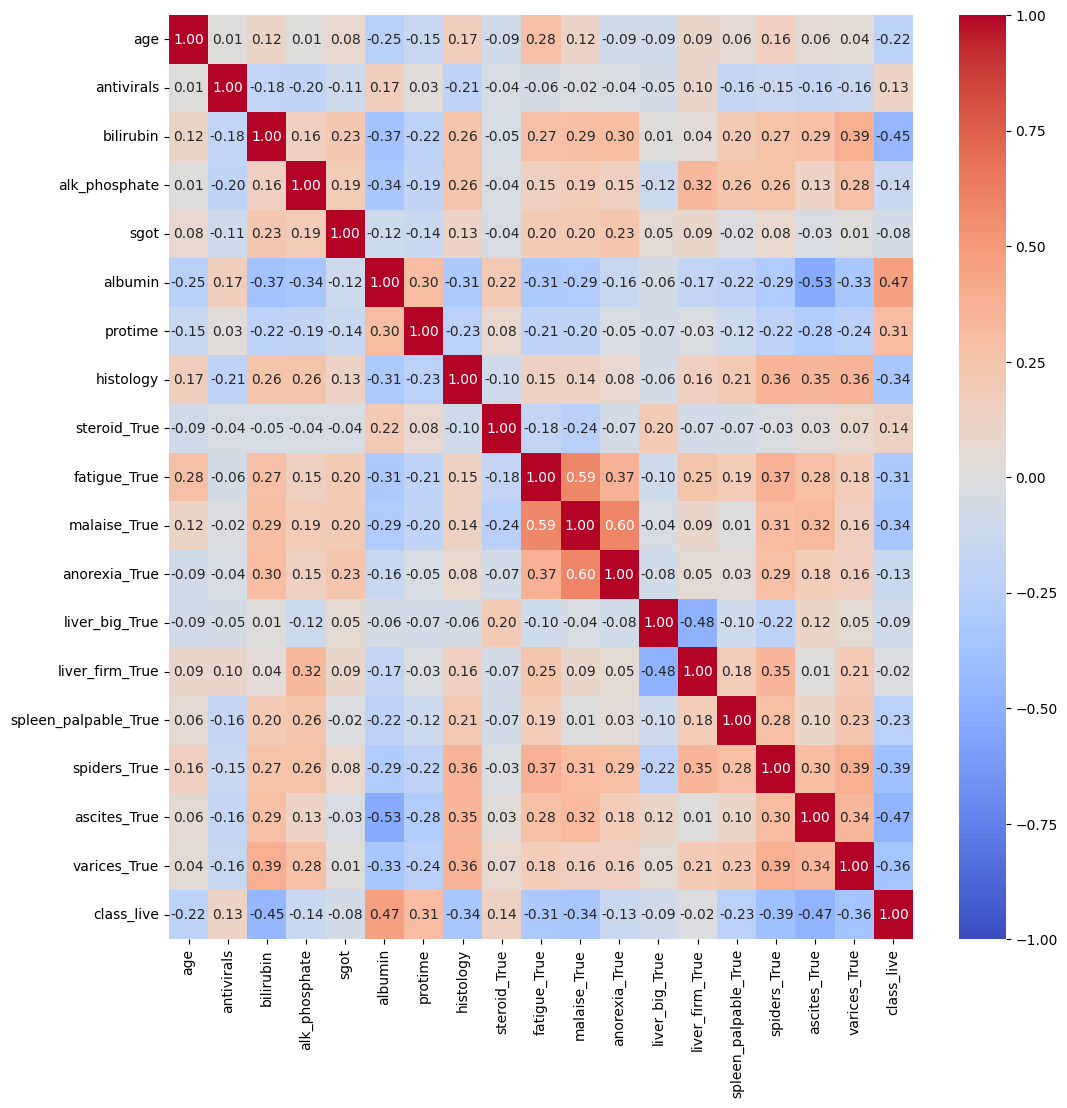

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X_Age_encoded = pd.get_dummies(X_Age, drop_first=True)  

correlation_matrix = X_Age_encoded.corr()

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f")


plt.savefig("corr.png")
plt.show()



In [33]:

correlations_with_output = correlation_matrix["class_live"].abs()

high_corr_features = correlations_with_output[correlations_with_output > 0.5].index

print("Selected Features with |correlation| > 0.5 with the output variable:")
print(high_corr_features)


Selected Features with |correlation| > 0.5 with the output variable:
Index(['class_live'], dtype='object')


In [34]:

corr_with_malaise = correlation_matrix["malaise_True"].abs()


high_corr_with_malaise = corr_with_malaise[corr_with_malaise > 0.5].index

X_Age_final = X_Age_encoded.drop(columns=high_corr_with_malaise)

print("Remaining Features after dropping those highly correlated with 'malaise':")
print(X_Age_final.columns)


Remaining Features after dropping those highly correlated with 'malaise':
Index(['age', 'antivirals', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology', 'steroid_True', 'liver_big_True',
       'liver_firm_True', 'spleen_palpable_True', 'spiders_True',
       'ascites_True', 'varices_True', 'class_live'],
      dtype='object')


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_Age_encoded.drop(columns='class_live'),
    X_Age_encoded['class_live'],
    test_size=0.2, 
    random_state=42 
)


print("Hold-out Strategy:")
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X_Age_encoded.drop(columns='class_live'),
    X_Age_encoded['class_live'],
    test_size=0.3,  
    random_state=42,
    stratify=X_Age_encoded['class_live']  
)


print("\nStratified Hold-out Strategy:")
print("Training set class distribution:")
print(y_train_stratified.value_counts(normalize=True))
print("\nTest set class distribution:")
print(y_test_stratified.value_counts(normalize=True))


Hold-out Strategy:
Training set class distribution:
class_live
True     0.798387
False    0.201613
Name: proportion, dtype: float64

Test set class distribution:
class_live
True     0.774194
False    0.225806
Name: proportion, dtype: float64

Stratified Hold-out Strategy:
Training set class distribution:
class_live
True     0.796296
False    0.203704
Name: proportion, dtype: float64

Test set class distribution:
class_live
True     0.787234
False    0.212766
Name: proportion, dtype: float64
